# The very best challenge like no one ever was!

# Notebook di training

In [50]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-manylinux2010_x86_64.whl (454.4 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached grpcio-1.34.1-cp38-cp38-manylinux2014_x86_64.whl (4.0 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached protobuf-3.17.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Using cached h5py-3.1.0-cp38-cp38-manylinux1_x86_64.whl (4.4 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wrapt-1.12.1-cp38-cp38-linu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_path = "./train.csv"
test_path = "./test.csv"
pokemons_path = "./pokemon.csv"

pokemon_data = pd.read_csv(pokemons_path)

### Una preparazione della tabella di lookup
Nel notebook di preparazione abbiamo visto che un Pokémon è definito da 12 attributi.
L'id ci servirà solamente per il lookup. Il nome possiamo intuire già ora che non influisce sugli esiti delle battaglie. Ciò che conta di più sono i tipi e le 6 statistiche. Il numero di generazione non dovrebbe influire sull'esito della battaglia, tutte le generazioni hanno Pokémon forti e Pokémon deboli. Un Pokémon leggendario è solitamente più forte dei Pokémon non leggendari, ma probabilmente riusciremo ad omettere questa feature in quanto la "leggendarietà" è correlata alla somma delle statistiche

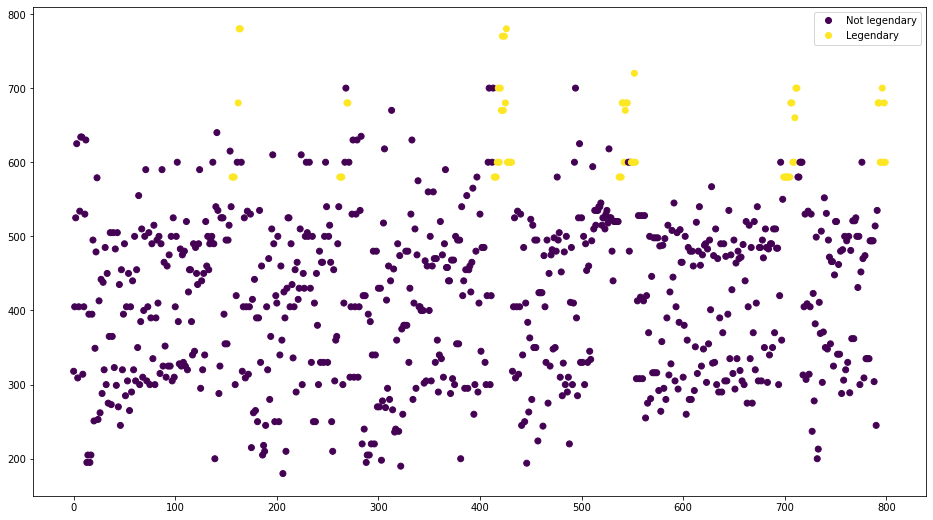

In [4]:
legendary = pd.DataFrame()
legendary["Stats"] = pokemon_data.iloc[:, 4:10].sum(axis=1)
legendary["Legendary"] = pokemon_data["Legendary"]
legendary["Generation"] = pokemon_data["Generation"]
plt.figure(figsize=(16, 9))
scatter = plt.scatter(legendary.index, legendary["Stats"], c=legendary["Legendary"])
plt.legend(handles=scatter.legend_elements()[0], labels=["Not legendary", "Legendary"])
plt.show()

Proprio come ci aspettavamo: i Pokémon leggendari hanno una somma di statistiche superiore

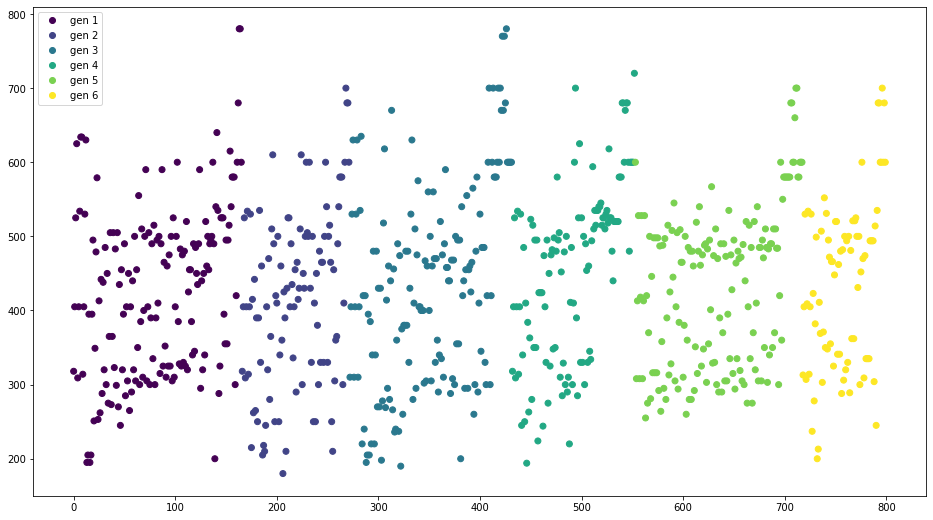

In [5]:
plt.figure(figsize=(16, 9))
scatter = plt.scatter(legendary.index, legendary["Stats"], c=legendary["Generation"])
plt.legend(handles=scatter.legend_elements()[0], labels=["gen {}".format(i) for i in range(1,7)])
plt.show()

Anche qui è come ipotizzavamo: ogni generazione ha Pokémon forti e Pokémon deboli, distribuiti ugualmente per ogni generazione.  
Pertanto la generazione non influisce sull'esito della battaglia

Pertanto possiamo estrarre le colonne rilevanti dalla tabella di lookup

In [6]:
features = ["#", "Type 1", "Type 2", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
pokemon_data = pokemon_data[features]

## I Tipi
I tipi dei Pokémon sono features categoriche. In totale sono 18, ognuno ha efficacia o debolezza sugli altri.
Ogni Pokémon può avere al massimo 2 tipi (questo vuol dire che aumentano le combinazioni di debolezza/efficacia, ma noi non siamo qui in veste di programmatori della battaglia ma solo in quanto analisti quindi non ci interessano questi dettagli).  
Il modo migliore di rappresentare un Pokémon è usare valori numerici per le statistiche e una matrice binaria per i tipi. Quindi ogni riga della tabella di lookup avrà valore = 1 in un tipo (o in 2 tipi) e 0 in tutti gli altri

In [7]:
pokemon_data["Type 1"] = pokemon_data["Type 1"].astype("str")
pokemon_data["Type 2"] = pokemon_data["Type 2"].astype("str")
types1 = pd.get_dummies(pokemon_data["Type 1"])
types2 = pd.get_dummies(pokemon_data["Type 2"])
types = types1 + types2
types = types.drop(columns=["nan"])
types.head(10)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
pokemon_data = pokemon_data.drop(columns=["Type 1", "Type 2"])

In [9]:
for col in types.columns:
    pokemon_data[col] = types[col]

In [10]:
pokemon_data

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,45,49,49,65,65,45,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,60,62,63,80,80,60,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3,80,82,83,100,100,80,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,80,100,123,122,120,80,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,39,52,43,60,50,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,50,100,150,100,150,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
796,797,50,160,110,160,110,110,0,0,0,...,0,0,0,0,0,0,0,1,0,0
797,798,80,110,60,150,130,70,0,0,0,...,1,0,0,0,0,0,1,0,0,0
798,799,80,160,60,170,130,80,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
types_names = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water']
stats_names = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

Normalizziamo i valori delle statistiche

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pokemon_data[stats_names] = scaler.fit_transform(pokemon_data[stats_names])
pokemon_data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creiamo la nostra tabella di lookup come prodotto cartesiano della tabella con sè stessa, per avere tutti i possibili accoppiamenti tra Pokémon

In [14]:
first_columns_names = []
second_columns_names = []
first_columns_names = ["{}1".format(row) for row in pokemon_data.columns]
second_columns_names = ["{}2".format(row) for row in pokemon_data.columns]
pokemon_data.columns

Index(['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Bug',
       'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying',
       'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
       'Rock', 'Steel', 'Water'],
      dtype='object')

In [15]:
train_data = pd.read_csv(train_path)
first_pokemon_data = pd.DataFrame(data=pokemon_data, copy=True)
first_pokemon_data.columns=first_columns_names
second_pokemon_data = pd.DataFrame(data=pokemon_data, copy=True)
second_pokemon_data.columns=second_columns_names

In [16]:
cross_pokemon_data = first_pokemon_data.merge(second_pokemon_data, how="cross")

Quando due Pokémon lottano competono sulle loro statistiche. Un Pokémon con un buon attacco probabilmente vincerà contro un Pokémon con scarsa difesa.  
Quindi possiamo utilizzare per il training la differenza tra le statistiche del primo e del secondo pokemon

In [17]:
cross_pokemon_data["id"] = cross_pokemon_data["#1"].astype("str") + "-" + cross_pokemon_data["#2"].astype("str")
cross_pokemon_data

,#1,HP1,Attack1,Defense1,Sp. Atk1,Sp. Def1,Speed1,Bug1,Dark1,Dragon1,...,Grass2,Ground2,Ice2,Normal2,Poison2,Psychic2,Rock2,Steel2,Water2,id
0,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-1
1,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-2
2,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-3
3,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-4
4,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,0,0,0,0,0,0,1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639995,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,0,1,0,0,800-796
639996,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,0,1,0,0,800-797
639997,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,1,0,0,0,800-798
639998,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,1,0,0,0,800-799


Definiamo una funzione che carichi i dati e li prepari per il training

In [52]:
total_features = ['HP1', 'Attack1', 'Defense1', 'Sp. Atk1', 'Sp. Def1', 'Speed1',
       'Bug1', 'Dark1', 'Dragon1', 'Electric1', 'Fairy1', 'Fighting1', 'Fire1',
       'Flying1', 'Ghost1', 'Grass1', 'Ground1', 'Ice1', 'Normal1', 'Poison1',
       'Psychic1', 'Rock1', 'Steel1', 'Water1', 'HP2', 'Attack2',
       'Defense2', 'Sp. Atk2', 'Sp. Def2', 'Speed2', 'Bug2', 'Dark2',
       'Dragon2', 'Electric2', 'Fairy2', 'Fighting2', 'Fire2', 'Flying2',
       'Ghost2', 'Grass2', 'Ground2', 'Ice2', 'Normal2', 'Poison2', 'Psychic2',
       'Rock2', 'Steel2', 'Water2']

def load_data(path):
    data = pd.read_csv(path)
    #ci serve un target OneHot di lunghezza 2 (es. [0, 1] se è il secondo Pokémon a vincere)
    data["isFirst"] = data["Winner"] == data["First_pokemon"]
    data["id"] = data["First_pokemon"].astype("str") + "-" + data["Second_pokemon"].astype("str")
    data= data.drop(columns=["First_pokemon", "Second_pokemon"]).merge(cross_pokemon_data, on="id")
    X = data[total_features].values
    y = pd.get_dummies(data["isFirst"]).values
    print("X shape: ", X.shape, "\n", "y shape: ", y.shape)
    return X, y

## Training time!

Ora che abbiamo i dati preprocessati possiamo addestrare la rete (non i Pokémon ahimé). Modelliamo una rete neurale utilizzando Keras

In [54]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [58]:
X_train, y_train = load_data(train_path) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10, stratify=y_train)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X shape:  (34000, 48) 
 y shape:  (34000, 2)
(25500, 48) (8500, 48) (25500, 2) (8500, 2)


In [59]:
in_dim = 48*2
hide_dim_1 = in_dim*3/2
hide_dim_2 = hide_dim_1*2/3
out_dim = 2


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(in_dim, input_dim=48, activation="relu"),
  tf.keras.layers.Dense(hide_dim_1 ,activation='relu'),
  tf.keras.layers.Dense(hide_dim_2 ,activation='relu'),
  tf.keras.layers.Dense(out_dim)
])

model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=250,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val)
)

Epoch 1/250
399/399 [==============================] - 2s 3ms/step - loss: 0.6792 - accuracy: 0.8134 - val_loss: 0.6029 - val_accuracy: 0.8473
Epoch 2/250
399/399 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.8502 - val_loss: 0.4856 - val_accuracy: 0.8496
Epoch 3/250
399/399 [==============================] - 1s 2ms/step - loss: 0.6079 - accuracy: 0.8395 - val_loss: 0.5624 - val_accuracy: 0.8421
Epoch 4/250
399/399 [==============================] - 1s 2ms/step - loss: 0.5231 - accuracy: 0.8642 - val_loss: 0.5042 - val_accuracy: 0.8799
Epoch 5/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3920 - accuracy: 0.8915 - val_loss: 0.4059 - val_accuracy: 0.8935
Epoch 6/250
399/399 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8926 - val_loss: 0.3963 - val_accuracy: 0.8994
Epoch 7/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.9060 - val_loss: 0.3966 - val_accuracy: 0.8955

Epoch 58/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9556 - val_loss: 0.3862 - val_accuracy: 0.9399
Epoch 59/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1633 - accuracy: 0.9678 - val_loss: 0.3949 - val_accuracy: 0.9358
Epoch 60/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1689 - accuracy: 0.9674 - val_loss: 0.4216 - val_accuracy: 0.9359
Epoch 61/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1770 - accuracy: 0.9654 - val_loss: 0.4200 - val_accuracy: 0.9392
Epoch 62/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1952 - accuracy: 0.9670 - val_loss: 0.5144 - val_accuracy: 0.9418
Epoch 63/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.9596 - val_loss: 0.9418 - val_accuracy: 0.8876
Epoch 64/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.9350 - val_loss: 0.3869 - val_accuracy:

Epoch 115/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2073 - accuracy: 0.9712 - val_loss: 0.6804 - val_accuracy: 0.9388
Epoch 116/250
399/399 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.9549 - val_loss: 0.6642 - val_accuracy: 0.9291
Epoch 117/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.9584 - val_loss: 0.5422 - val_accuracy: 0.9320
Epoch 118/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.9611 - val_loss: 0.6291 - val_accuracy: 0.9351
Epoch 119/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.9658 - val_loss: 0.6288 - val_accuracy: 0.9364
Epoch 120/250
399/399 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.9511 - val_loss: 0.5553 - val_accuracy: 0.9371
Epoch 121/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.9649 - val_loss: 0.5667 - val_ac

399/399 [==============================] - 1s 3ms/step - loss: 0.1965 - accuracy: 0.9791 - val_loss: 0.7609 - val_accuracy: 0.9309
Epoch 172/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3022 - accuracy: 0.9684 - val_loss: 0.6200 - val_accuracy: 0.9369
Epoch 173/250
399/399 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.9553 - val_loss: 0.7866 - val_accuracy: 0.9266
Epoch 174/250
399/399 [==============================] - 1s 3ms/step - loss: 0.5419 - accuracy: 0.9376 - val_loss: 0.6824 - val_accuracy: 0.9114
Epoch 175/250
399/399 [==============================] - 1s 3ms/step - loss: 0.2877 - accuracy: 0.9560 - val_loss: 0.5811 - val_accuracy: 0.9284
Epoch 176/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2332 - accuracy: 0.9641 - val_loss: 0.4840 - val_accuracy: 0.9349
Epoch 177/250
399/399 [==============================] - 1s 3ms/step - loss: 0.1781 - accuracy: 0.9727 - val_loss: 0.4911 - val_accuracy: 0.9371

399/399 [==============================] - 1s 2ms/step - loss: 0.2564 - accuracy: 0.9791 - val_loss: 0.7463 - val_accuracy: 0.9425
Epoch 228/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2322 - accuracy: 0.9809 - val_loss: 0.7347 - val_accuracy: 0.9401
Epoch 229/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1744 - accuracy: 0.9842 - val_loss: 0.6439 - val_accuracy: 0.9454
Epoch 230/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1177 - accuracy: 0.9890 - val_loss: 0.6320 - val_accuracy: 0.9465
Epoch 231/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9922 - val_loss: 0.6227 - val_accuracy: 0.9479
Epoch 232/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9941 - val_loss: 0.6115 - val_accuracy: 0.9499
Epoch 233/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9945 - val_loss: 0.6168 - val_accuracy: 0.9505

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


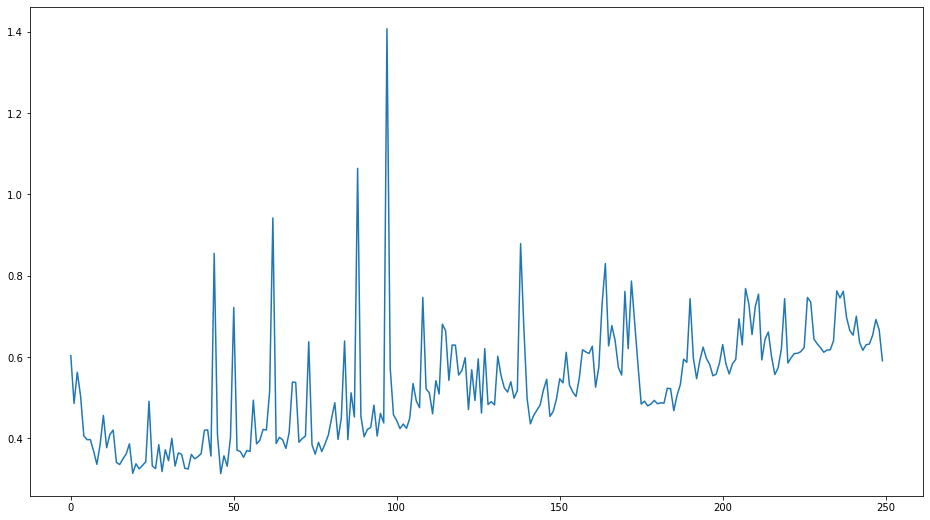

In [73]:
print(history.history.keys())
plt.figure(figsize=(16,9))
plt.plot(history.history["val_loss"])